| **AVISO** |
|---|
| Este é um template para criação de análises utilizando Pandas, Seaborn e MatPlotLib. <br><br> **Observe os seguintes pontos:** <br> - Em determinadas partes do template, quando aparecer uma string entre "<"e ">", significa que você deve substituir por seus próprios valores <br> - Como padronização, o nosso DataFrame pandas se chamará **df** <br> - As áreas de texto tem sugestões do conteúdo que pode ser descrito naquela seção | 
| Aproveite!!! | 


# <INSIRA SEU TÍTULO AQUI>

Aqui você fazer uma breve introdução sobre a análise que será feita neste notebook. 

## Bibliotecas Utilizadas

Aqui introduzimos o código que carrega as bibliotecas necessárias para a execução da análise.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

## Carregando Variáveis de Configuração

Nesta seção fazemos a definição de variáveis de configuração, que serão usadas ao longo da análise. Aqui temos duas iniciais: a variável que contém o nome do arquivo do dataset, que será carregado no DataFrame pandas, e a variável que indica se precisamos fazer o download dos arquivos de datasets do curso.

In [9]:
nome_arquivo = "content/datasets/worldpop/world_population.csv"
download_datasets = False

#Definindo a nossa paleta de cores
cores = ["#0c4f6a", "#177498", "#0a8faa", "#bfdce5", "#82bd4a", "#b8d67a",
         "#b2b3b6", "#58585a", "#edb634", "#d97933", "#f1bdb1", "#eca091",
         "#e26c54", "#b0391e"]

## Inicializando as Configurações Globais do MatPlotLib e Seaborn

Aqui vamos deixar as configurações globais do MatPlotLib e do Seaborn.

In [10]:
# Para impedir que qualquer gráfico seja plotado durante a configuração
plt.ioff()

# Tamanho da Imagem
# Este tamanho é em polegadas
# O primeiro valor é Largura e o segundo, Altura
plt.rcParams["figure.figsize"]=(9,5)

# Resolução da Imagem
# 300 dpi é o padrão mínimo para impressão
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

# Removendo Bordas em torno do gráfico
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False

# Acertando a configuração da Legenda
# Tamanho da Fonte pode ser expressado por um número ou 
# pelos valores abaixo:
# - 'xx-small', 
# - 'x-small', 
# - 'small', 
# - 'medium', 
# - 'large', 
# - 'x-large', 
# - 'xx-large'
plt.rcParams["legend.fontsize"] = 'small'
plt.rcParams["legend.title_fontsize"] = 'x-small'
plt.rcParams["legend.frameon"] = False

# Modificando o formato de exibição dos valores nos eixos
# Será necessário formatar esse dado quando for transformado em labels
plt.ticklabel_format(style="plain", useLocale=True)

# Configurando o titulo do eixo X
plt.xlabel('<Insira o seu título aqui ou deixe vazio para remover>')

# Configurando o título do gráfico
plt.title('<Insira o seu título aqui>', fontsize='medium', loc="left")

# Configurando o tamanho dos valores que aparecem nos eixos
plt.tick_params(axis='both', which='major', labelsize='small')

# Carregando a paleta de cores
sns.set_palette(sns.color_palette(cores))

## Carregando os dados no DataFrame

Aqui nesta seção, iremos colocar todas as operações para carregar os dados que serão plotados. A primeira seção de código serve para carregar os arquivos de datasets.

In [11]:
if download_datasets:
  !git lfs clone -l -s https://github.com/labeduc/datasets.git

A segunda seção de código é a carga do DataFrame.

In [12]:
df = pd.read_csv(nome_arquivo)

## Preparando os dados

Aqui vamos incluir o código para transformar os dados para serem plotados.

In [13]:
# Primeiro, selecionamos apenas as colunas que nos interessam, gerando um novo dataframe
prep_df = df[["Country", "1970 Population", "1980 Population", "1990 Population", "2000 Population", "2010 Population", "2015 Population", "2020 Population", "2022 Population"]]

# Renomeamos as colunas removendo a palavra Population da coluna de cada ano para ocupar menos espaço no gráfico
# Utilizamos a opção inplace=True para que a modificação seja feita no mesmo DataFrame
prep_df.rename(columns={"1970 Population": "1970", "1980 Population": "1980", "1990 Population": "1990", "2000 Population": "2000", "2010 Population": "2010", "2015 Population": "2015", "2020 Population": "2020", "2022 Population": "2022"}, inplace=True)

# Usando o comando melt para gerar um dataframe adequado para a plotagem
prep_df = prep_df.melt(id_vars="Country", value_name="Population", var_name="Year")

# Para limitar o número de barras, vamos selecionar apenas os países do BRICS
prep_df = prep_df[prep_df["Country"].isin(["United States", "Brazil", "India", "China", "Russia", "South Africa"])]

# Ordenamos por país e ano
prep_df = prep_df.sort_values(["Country", "Year"], ascending=[True, True])

#Geramos a lista de países baseado nos dados
paises = prep_df["Country"].unique().tolist()

# Agora calculamos a diferença entre a população do ano atual e o ano anterior e expressa-la em percentual.
# 1 - Percorremos a lista de paises
diferencas = []
for pais in paises:
  # Separamos as linhas do dataframe daquele país
  country_data = prep_df.query(f"Country == '{pais}'")
  # Geramos uma série com as diferenças
  diffs = country_data['Population'].rolling(window=2).apply(lambda x: ((x.iloc[1] - x.iloc[0])/x.iloc[0])*100)
  # adicionamos em uma lista
  diferencas.append(diffs)

# 2- Ao termino dos calculos, adicionamos a nova coluna no dataframe
prep_df['Difference'] = pd.concat(diferencas)

# 3 - Por último, criamos uma categoria baseada no Percentual, que iremos utilizar para colorir as barras
cores_barras = prep_df['Difference'].apply(lambda x: "> 20%" if x > 20 else "< 0%" if x < 0 else "> 0% e < 20%")
prep_df["Crescimento Sobre Ano Anterior"] = cores_barras

C:\Users\walter_ritzel\AppData\Local\Temp\ipykernel_26188\4004934469.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_df.rename(columns={"1970 Population": "1970", "1980 Population": "1980", "1990 Population": "1990", "2000 Population": "2000", "2010 Population": "2010", "2015 Population": "2015", "2020 Population": "2020", "2022 Population": "2022"}, inplace=True)


## Plotando o Gráfico

A próxima etapa é plotar o gráfico e aplicar as transformações pós-plotagem.

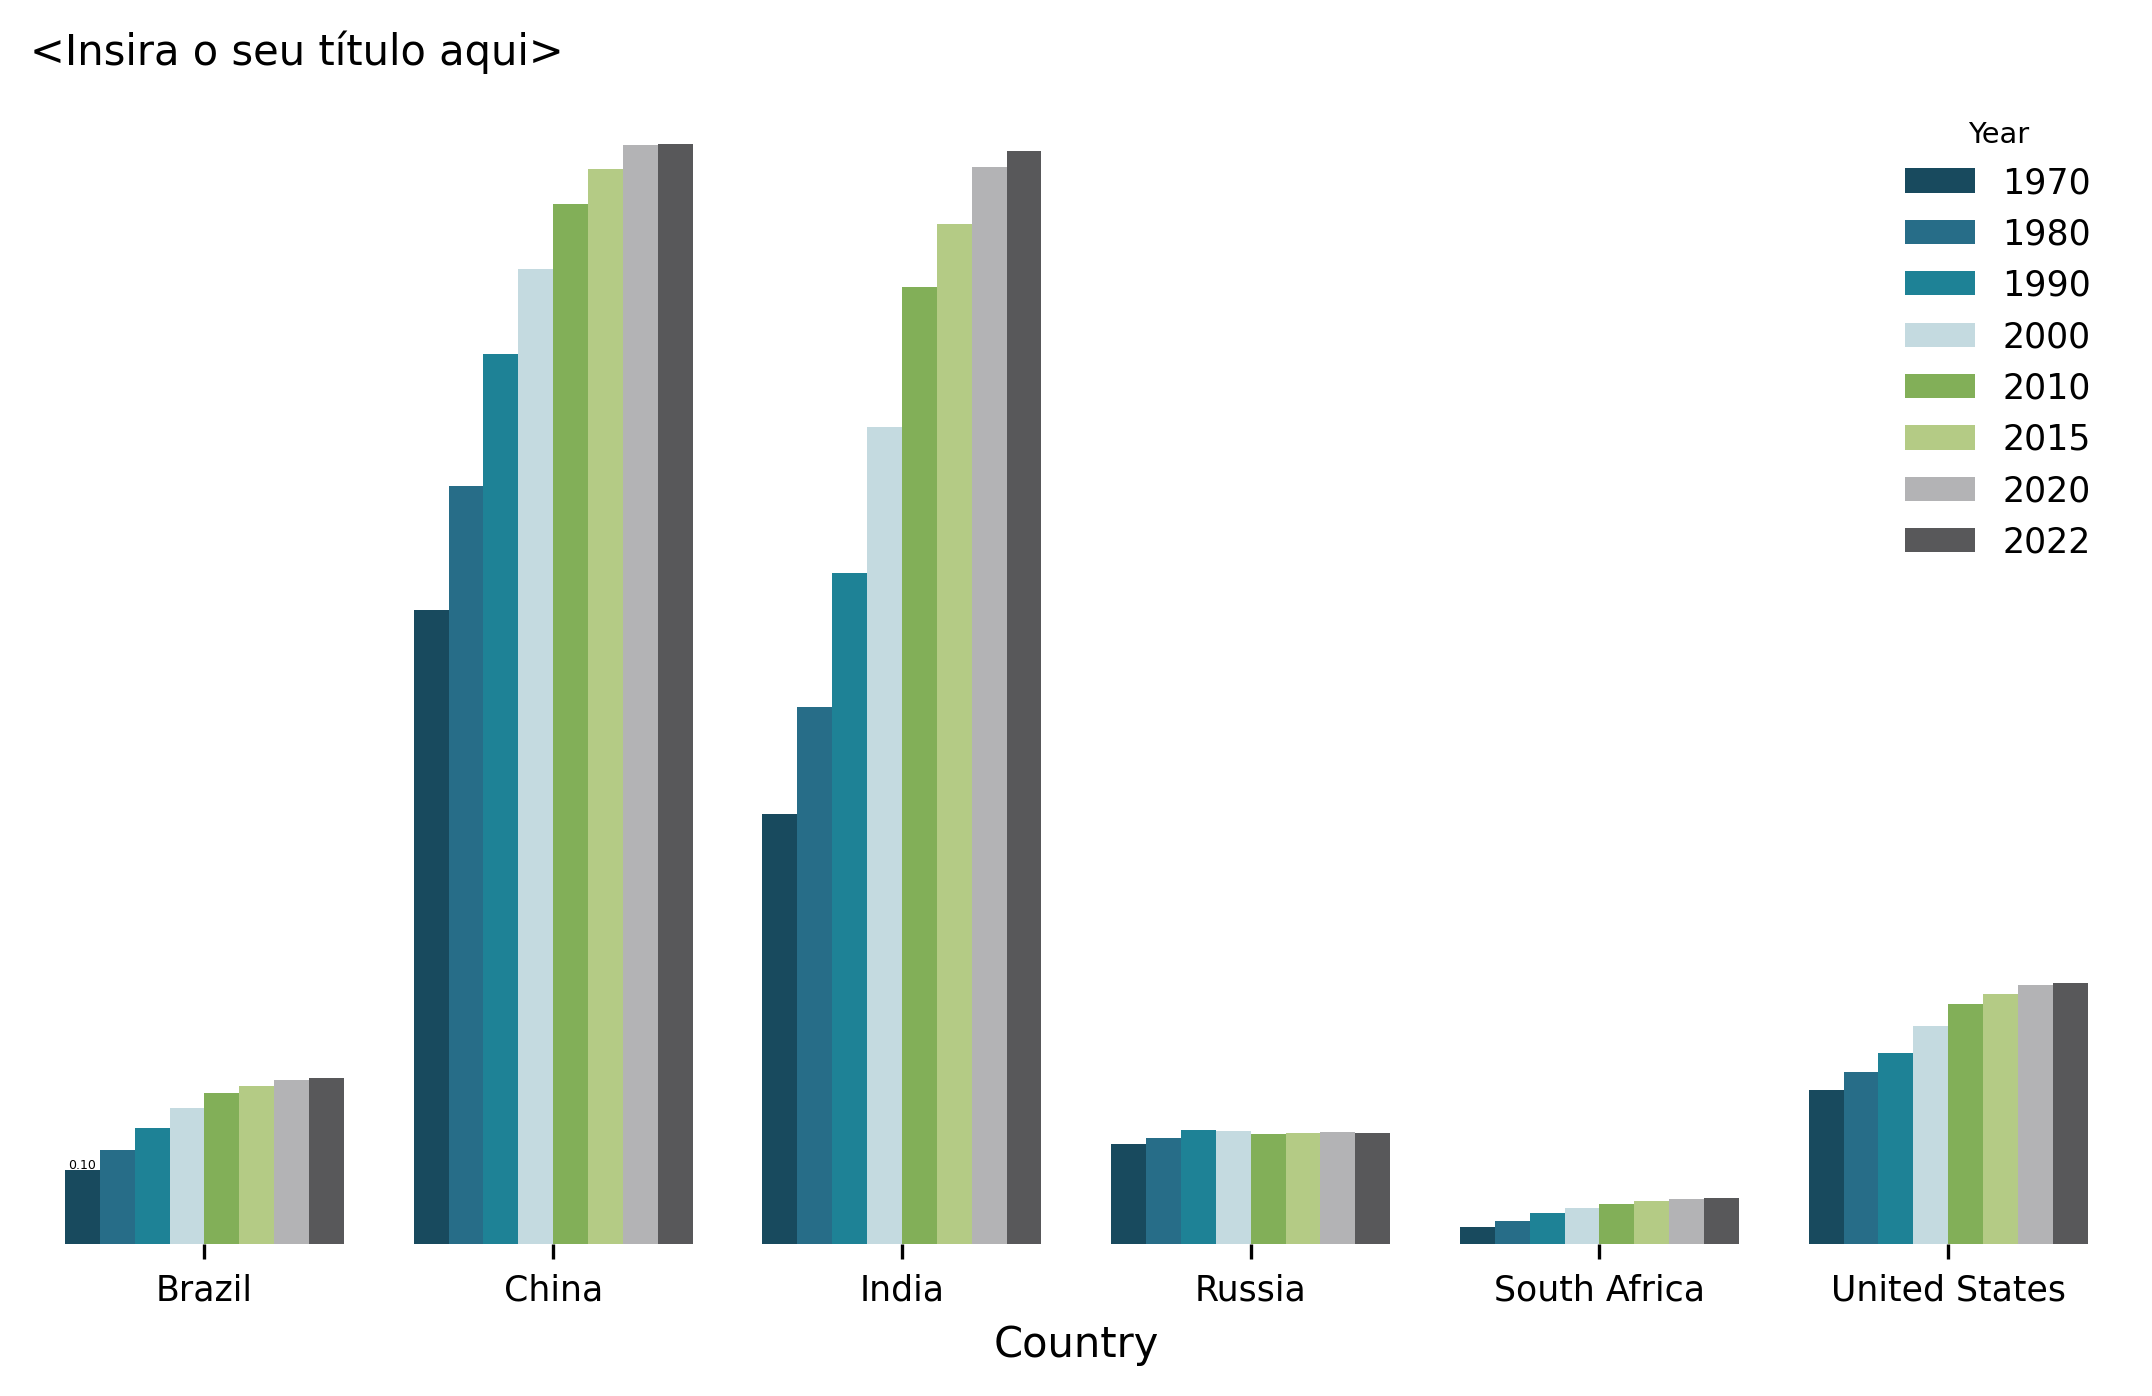

In [14]:
# Gero o objeto do gráfico
sx = sns.barplot(x=prep_df["Country"], y=prep_df["Population"], hue=prep_df["Year"])

# Removendo todo o eixo Y
sx.get_yaxis().set_visible(False)

# O Objeto patches contém todos os elementos (neste caso barras) que foram plotados no gráfico
# Então percorremos eles e fazemos os seguintes calculos:
# a coordenada x para posicionar o texto = Coordenada X do canto superior da barra + largura da barra / 2
# a coordenada Y para posicionar o texto = Coordenada Y do canto superior da barra + 1% desta altura
for p in sx.patches:
  _x = (p.get_x() + p.get_width() / 2)
  _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
  value = '{:.2f}'.format(p.get_height()/1000000000)
  sx.text(_x, _y, value, ha="center", size=3) 

  plt.show()